In [1]:
import torch
import pandas as pd
from PIL import Image

import sys
sys.path.append('../../')
from model_runner import ModelRunner
from image_helper import ImageHelper
from SRCNN import SRCNN

sys.path.append('../../DBPN/')
from DBPN_copied import DBPN

In [2]:
DATASET_ROOT="../../datasets/"
DATASET_NAME = "Set5"
FULL_DATASET_PATH = f"{DATASET_ROOT}{DATASET_NAME}"
model_runner = ModelRunner()
image_helper = ImageHelper()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load model
test_model = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)
more_data_model = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)
even_more_data_model = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)
more_epochs_less_data_model = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)
test_model_2 = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)
model_f2_5 = SRCNN(f2=5).to(device)
try:
    test_model.load_state_dict(torch.load('./trained_models/model_L_big_data.pth'))
    more_data_model.load_state_dict(torch.load('./trained_models/model-01-08-epoch=0->99.pth'))
    # test_model.load_state_dict(torch.load('./trained_models/model_L_big_data-100-200.pth'))
    model_f2_5.load_state_dict(torch.load('../srcnn/trained_models/model_f2_5.pth'))
    more_epochs_less_data_model.load_state_dict(torch.load('../dbpn/trained_models/model-05-08-epoch=0-299.pth'))

except:
    test_model.load_state_dict(torch.load('./trained_models/model_L_big_data.pth', map_location=torch.device('cpu')))
    more_data_model.load_state_dict(torch.load('./trained_models/model-01-08-epoch=0->99.pth', map_location=torch.device('cpu')))
    # test_model.load_state_dict(torch.load('./trained_models/model_L_big_data-100-200.pth', map_location=torch.device('cpu')))
    model_f2_5.load_state_dict(torch.load('../srcnn/trained_models/model_f2_5.pth', map_location=torch.device('cpu')))
    more_epochs_less_data_model.load_state_dict(torch.load('../dbpn/trained_models/model-05-08-epoch=0-299.pth', map_location=torch.device('cpu')))


In [4]:
# # Load dataframes
more_data_model_df = pd.read_csv('./dataframes/model-01-08-epoch=0->99.csv')
even_more_data_model_df = pd.read_csv('./dataframes/model-01-08-epoch=99-151.csv')

# model_f2_1_df = pd.read_csv('./dataframes/model_f2_1.csv')
# model_f2_1_unfiltered_df = pd.read_csv('./dataframes/model_f2_1_unfiltered.csv')
# model_f2_lr_fixed_df = pd.read_csv('./dataframes/model_f2_1_lr_fixed_1e-3.csv')
# model_f2_5_df = pd.read_csv('./dataframes/model_f2_5.csv')
# model_f2_5_unfiltered_df = pd.read_csv('./dataframes/model_f2_5_unfiltered.csv')


In [5]:
even_more_data_model_df.tail(20)

,epoch,time,lr,train_loss,validation_loss
33,33,1008.014560,1.000000e-15,0.004469,0.00449
34,34,1008.494455,1.000000e-15,0.004468,0.00449
35,35,1008.345462,1.000000e-16,0.004469,0.00449
36,36,725.489186,1.000000e-16,0.004467,0.00449
37,37,625.731568,1.000000e-16,0.004468,0.00449
38,38,625.568449,1.000000e-16,0.004468,0.00449
39,39,625.514663,1.000000e-17,0.004467,0.00449
40,40,625.231123,1.000000e-17,0.004468,0.00449
41,41,625.197216,1.000000e-17,0.004467,0.00449
42,42,624.969133,1.000000e-17,0.004468,0.00449


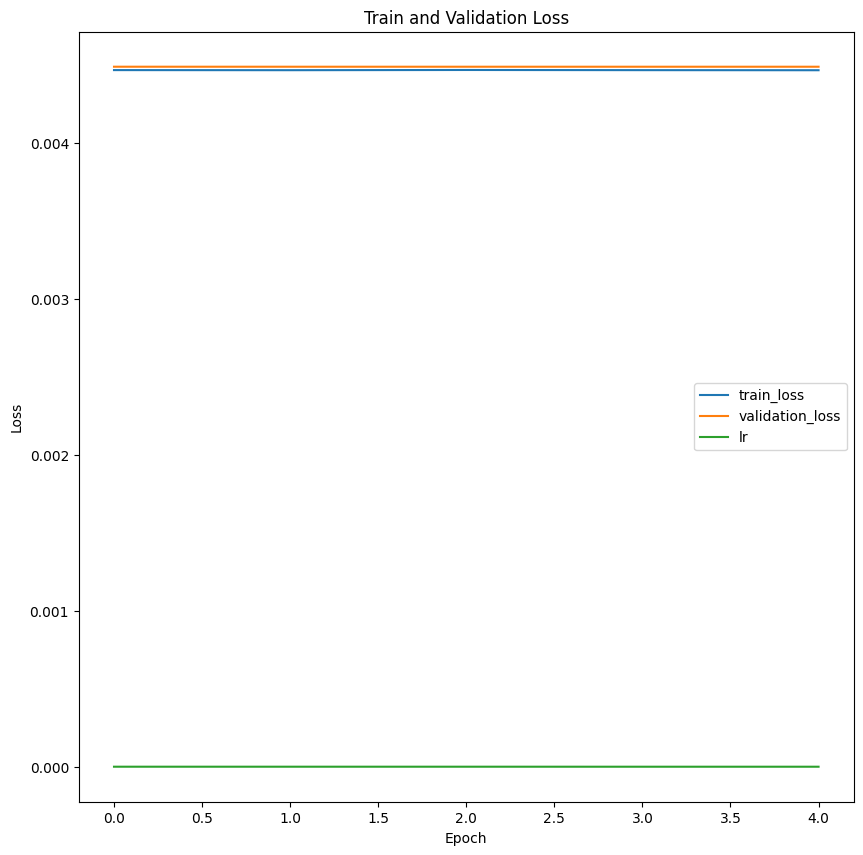

In [6]:
model_runner.plot_train_validation_loss_from_df(even_more_data_model_df.head(), show_lr=True)

In [7]:
# Define the range of values
lower_bound = 0.004468
upper_bound = 0.004470

s = more_data_model_df['train_loss']
entries_within_range = s.between(lower_bound, upper_bound).sum()
entries_within_range

31

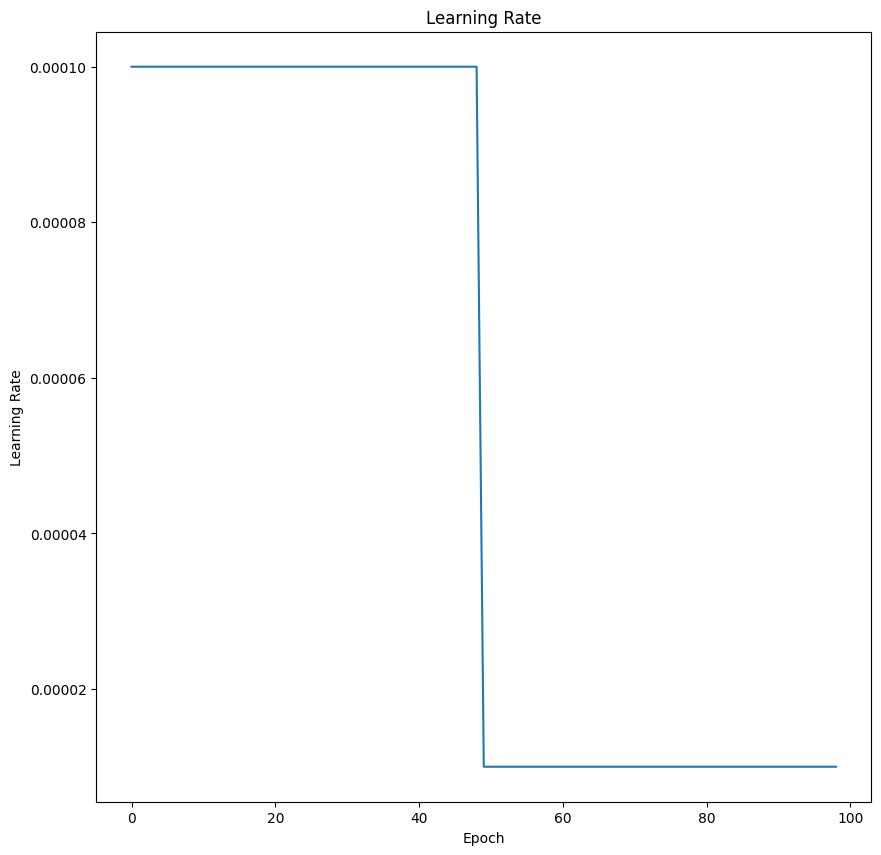

In [8]:
model_runner.plot_lr_from_df(more_data_model_df)

In [9]:
a = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)

/home/pedrovelozo/TCC-Pedro-Velozo-ENG1132/env/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the val

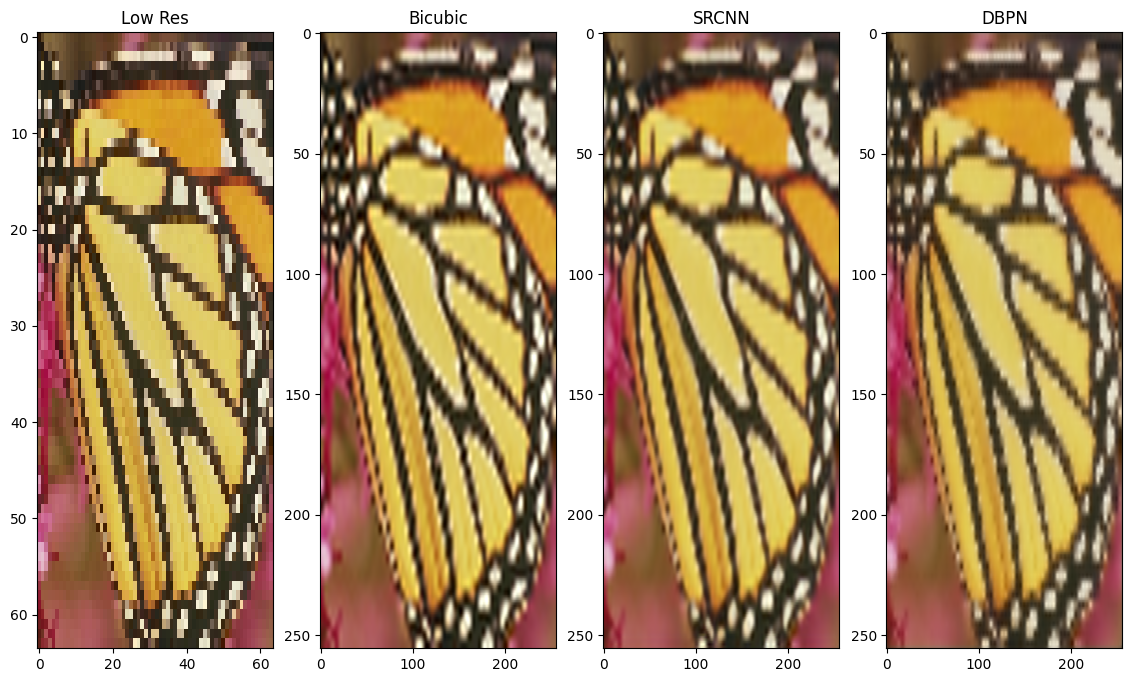

In [10]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/butterfly.png"

image_helper.show_tensor_as_images_side_by_side(
    [
        {
            "label": "Low Res",
            "tensor": image_helper.downsample_image_as_tensor(
                IMAGE_EXAMPLE, 4, interpolation=Image.BICUBIC,
            ),
        },
        {
            "label": "Bicubic",
            "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                IMAGE_EXAMPLE, 4
            ),
        },
        {
            "label": "SRCNN",
            "tensor": image_helper.apply_model_to_image(
                model_f2_5,
                IMAGE_EXAMPLE,
                4
            )
        },
        {
            "label": "DBPN",
            "tensor": image_helper.apply_model_to_image(
                model=test_model,
                image=IMAGE_EXAMPLE,
                downsample_factor=4,
                should_upsample=False,
                unsqueeze=True
            )
        },
        # {
        #     "label": "DBPN",
        #     "tensor": image_helper.apply_model_to_image(
        #         model=more_data_model,
        #         image=IMAGE_EXAMPLE,
        #         downsample_factor=4,
        #         should_upsample=False,
        #         unsqueeze=True
        #     )
        # },
        # {
        #     "label": "DBPN",
        #     "tensor": image_helper.apply_model_to_image(
        #         model=even_more_data_model,
        #         image=IMAGE_EXAMPLE,
        #         downsample_factor=4,
        #         should_upsample=False,
        #         unsqueeze=True
        #     )
        # },
        # {
        #     "label": "DBPN *",
        #     "tensor": image_helper.apply_model_to_image(
        #         model=more_epochs_less_data_model,
        #         image=IMAGE_EXAMPLE,
        #         downsample_factor=4,
        #         should_upsample=False,
        #         unsqueeze=True
        #     )
        # },
    ],
)

In [23]:
model_runner.compare_models(
    [
        # {
        #     "name": "f2=1",
        #     "model": model_f2_1,
        # },
        {
            "name": "DBPN",
            "model": test_model,
        },
        {
            "name": "SRCNN",
            "model": model_f2_5,
        },
        # {
        #     "name": "f2=5 unfiltered",
        #     "model": model_f2_5_unfiltered,
        # },
    ],
    FULL_DATASET_PATH,
)

0it [00:00, ?it/s]


RuntimeError: Given groups=1, weight of size [64, 128, 1, 1], expected input[1, 64, 2048, 1024] to have 128 channels, but got 64 channels instead

## **Comparando o treinamento**

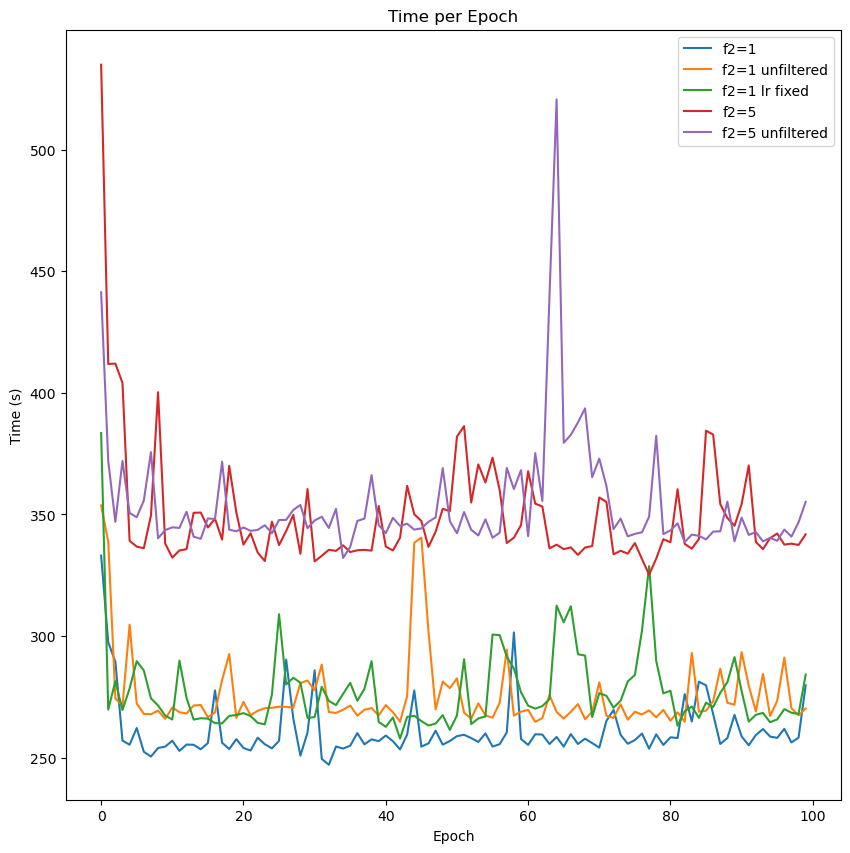

In [9]:
model_runner.plot_time_per_epoch_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)


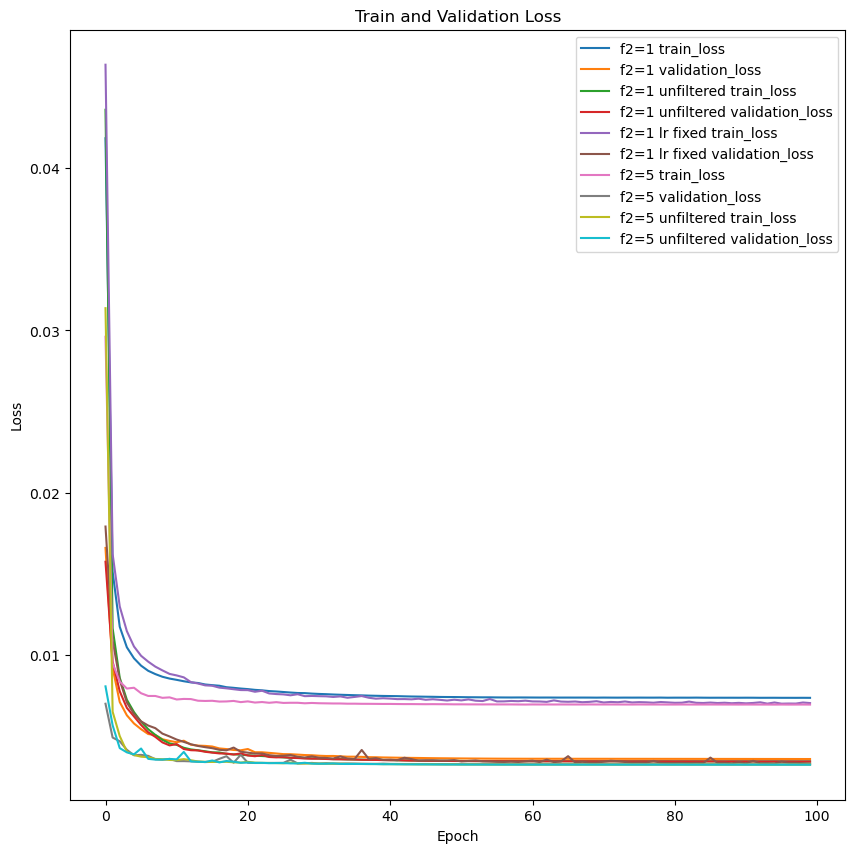

In [13]:
model_runner.plot_train_validation_loss_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
    False
)

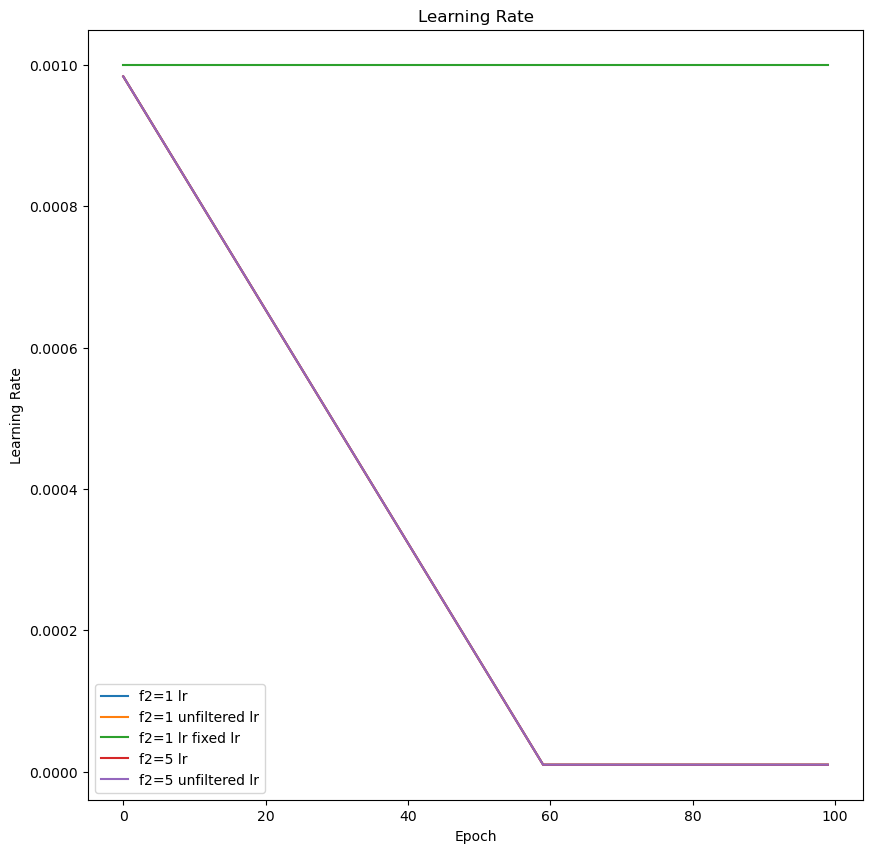

In [14]:
model_runner.plot_lr_comparison(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)

#### - F2 maior -> maior tempo de processamento

## **Comparando os resultados**

In [15]:
model_runner.compare_models(
    [
        {
            "name": "f2=1",
            "model": model_f2_1,
        },
        {
            "name": "f2=1 unfiltered",
            "model": model_f2_1_unfiltered,
        },
        {
            "name": "f2=1 lr fixed",
            "model": model_f2_lr_fixed,
        },
        {
            "name": "f2=5",
            "model": model_f2_5,
        },
        {
            "name": "f2=5 unfiltered",
            "model": model_f2_5_unfiltered,
        },
    ],
    FULL_DATASET_PATH,
)

0it [00:00, ?it/s]

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
14it [00:17,  1.27s/it]
14it [00:16,  1.18s/it]
14it [00:17,  1.22s/it]
14it [00:19,  1.40s/it]
14it [00:18,  1.36s/it]


,f2=1,f2=1 unfiltered,f2=1 lr fixed,f2=5,f2=5 unfiltered
PSNR,24.557707,24.604319,24.804457,24.815763,24.759735
Bicubic PSNR,24.496826,24.496826,24.496826,24.496826,24.496826
SSIM,0.714441,0.717399,0.724465,0.726433,0.724994
Bicubic SSIM,0.731671,0.731671,0.731671,0.731671,0.731671


Podemos observar que o os dados filtrados fizeram uma diferenca no caso em que f2=5 **[Vai ser mostrado quando eu ajeitar os pesos do f2_5]**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


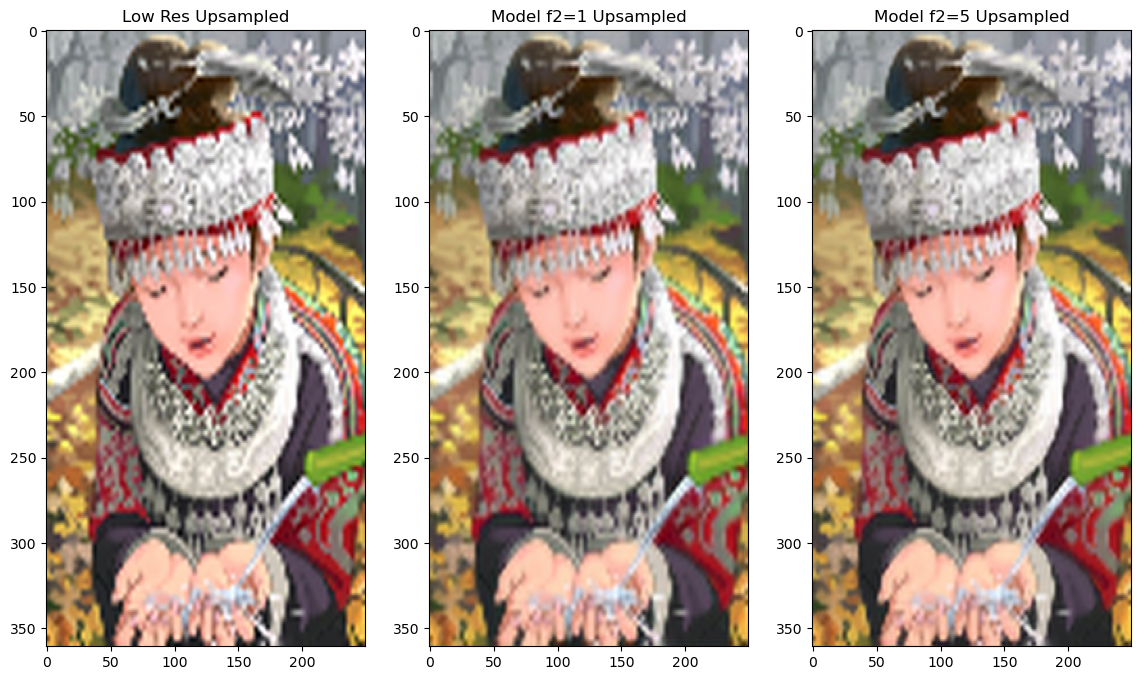

In [11]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/comic.png"

image_helper.show_tensor_as_images_side_by_side(
   [
        #  {
        #         "label": "Original",
        #         "tensor": image_helper.image_to_tensor(
        #            IMAGE_EXAMPLE
        #         ),
        #  },
            {
                "label": "Low Res Upsampled",
                "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                    IMAGE_EXAMPLE, 3
                ),
            },
            {
                "label": "Model f2=1 Upsampled",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_1,
                    IMAGE_EXAMPLE,
                    3
                )
            },
            {
                "label": "Model f2=5 Upsampled",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_5,
                    IMAGE_EXAMPLE,
                    3
                )
            },
            # {
            #     "label": "Model f2=1 Unfiltered Upsampled",
            #     "tensor": image_helper.apply_model_to_image(
            #         model_f2_1_unfiltered,
            #         IMAGE_EXAMPLE,
            #         3
            #     )
            # },
            # {
            #     "label": "Model f2=5 Unfiltered Upsampled",
            #     "tensor": image_helper.apply_model_to_image(
            #         model_f2_5_unfiltered,
            #         IMAGE_EXAMPLE,
            #         3
            #     )
            # },
            # {
            #     "label": "Model f2=1 lr fixed Upsampled",
            #     "tensor": image_helper.apply_model_to_image(
            #         model_f2_lr_fixed,
            #         IMAGE_EXAMPLE,
            #         3
            #     )
            # },
   ],
   show_grid=False
)